In [7]:
import numpy, math
from matplotlib import pyplot as plt
from matplotlib import patches
from src import code_toggle
%matplotlib inline

# Warm-up exercises


\begin{align*}
&1.\quad & \frac{dN}{dt} &= k &\text{Find } N &=\\
&2.\quad & \frac{dN}{dt} &= kN &\text{Find } N&=\\
&3. \quad & \frac{dN}{dt} &= -kN &\text{Find } N&=\\
&4. \quad & \frac{dy}{dx} &= \ln x &\text{Find } y&=\\
&5. \quad && \frac{1}{400}-\frac{1}{500} &&=\\
&6. \quad && \ln 4^3 - \ln 4^2&&=\\
&7. \quad && \frac{\sqrt{8}\pi^{3/2}}{4\pi^2\pi^{1/2}} &&=\\
&8.\quad && \text{Write 1m}^3 \text{ in cm}^3 &&=\\ 
\end{align*}
9. At a College there are 306 students. The male:female ratio is 1:8. How many men are there?

10. If 35 $\mu$l of 2.5 M HCL is added to 125 $\mu$l of 0.5 HCl what is the concentration of the final solution?


# Challenges

<div class="alert alert-block alert-success">
<img src="images/pointing-finger.png" width=50 title="For you" style="vertical-align:top"/>
<b>For you:</b> Answer to Week 6 challenge. 
There are a hundred switches. Each time you press one it goes from off to on or vice versa. Each is connected to a light bulb. 100 frogs are lined up. Frog 1 jumps on all the switches, turning on all the lights. Frog 2 jumps on switches 2,4,6,..100, turning off all the even numbered lights. Frog 3 jumps on switches 3,6,9...,99 thereby turning some lights off (e.g. 3) on some back on (e.g. 6). The frogs take it in turn until Frog 100 jumps only on switch 100. After the last frog has jumped, how many lights are still on?
</div>

The key to this puzzle is to realise that it is really a question about which numbers between 1 and 100 have odd factors all the light bulbs start off and each light bulb is jumped on by each frog corresponding to one of its factors. So frog 1 jumps on all the light bulbs since 1 is a factor of all the numbers between 1 and 100. Consider light bulb 12: it will be jumped on by frogs 1,2,3,4,6 and 12 which is an even number so it will be off after the last frog. All are by definition a pair of numbers *except* for pairs where the number is reapeated i.e. square numbers. Hence only the square numbers will be jumped on an odd number of times and so will remain on after frog 100. The answer is therefore 10 light bulbs: 1,4,9,16,25,36,49,64,81,100.

In [9]:
light_bulbs=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]

for frog in range(1,11):
    for hop in range(1,11):
        if (hop%frog)==0:
            light_bulbs[hop-1]=int(light_bulbs[hop-1]!=1)
    print(frog, light_bulbs)

print("\nAfter frog 10 the number of light bulbs that are on is "+str(sum(light_bulbs)))

1 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
2 [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
3 [1, 0, 0, 0, 1, 1, 1, 0, 0, 0]
4 [1, 0, 0, 1, 1, 1, 1, 1, 0, 0]
5 [1, 0, 0, 1, 0, 1, 1, 1, 0, 1]
6 [1, 0, 0, 1, 0, 0, 1, 1, 0, 1]
7 [1, 0, 0, 1, 0, 0, 0, 1, 0, 1]
8 [1, 0, 0, 1, 0, 0, 0, 0, 0, 1]
9 [1, 0, 0, 1, 0, 0, 0, 0, 1, 1]
10 [1, 0, 0, 1, 0, 0, 0, 0, 1, 0]

After frog 10 the number of light bulbs that are on is 3


<div class="alert alert-block alert-success">
<img src="images/pointing-finger.png" width=50 title="For you" style="vertical-align:top"/>
<b>For you:</b> Week 7 Challenge: I have 8 identical balls, and a ninth that looks identical but which is either lighter or heavier than the others. I have a pair of weighing scales which are the old  fashioned balance ones with a plate on each side of the balance point. I am allowed three uses of these scales to identify the odd ball. How can I do it?
</div>

# Differential Equations (cont.)

## Radioactivity Example - Stonehenge

The amount of $^{14}$C (radioactive carbon-14) in a sample is measured using a Geiger counter, which records each disintegration of an atom.  The rate at which $^{14}$C decays is proportional to the amount present. The half-life of $^{14}$C is about 5,730 years. This means that half of the sample will have disintegrated after 5,730 years.

In living tissue, $^{14}$C disintegrates at a rate of about 13.5 atoms per minute per gram of carbon.  Because living tissue is constantly exchanging carbon with its environment, the proportion of $^{14}$C among its carbon atoms remains constant over time.  Once the tissue is no longer living, this constant exchange of carbon ceases and the fraction of $^{14}$C among its carbon atoms begins to get smaller.  Consequently, the disintegration rate drops.

In 1977 a charcoal fragment found at Stonehenge on the Salisbury Plain recorded 8.2 disintegrations per minute per gram of carbon - about 60\% of that for living tissue.  Assuming that the charcoal was formed during the building of the site, we want to use this information to estimate the date at which Stonehenge was built.

What do we know?


$${dN_0\over dt}=13.5{\rm~atoms/min/gm}$$
and

$${dN_t\over dt}=8.2{\rm~atoms/min/gm}$$


Also: $t_{1/2} =5730$ yrs and thus $\lambda=\ln 2/5730$, so consider the ratio of the disintegration rates 

\begin{align*}
{{dN_t\over dt}\over {dN_0\over dt}}&={-\lambda N_t\over -\lambda N_0}\\
{8.2\over 13.5}&={N_0e^{-\lambda t}\over N_0}\\
&=e^{-\lambda t}\\
&=e^{- \left({\ln 2 \times t\over 5730}\right)}\\
\ln{8.2\over 13.5}&={-\ln 2\times t\over 5730}\\
t &= -\frac{5730}{\ln 2} \times \ln{8.2\over 13.5}\\
&= \frac{5730}{\ln 2} \times 0.4952\\
&= 4121.4{\rm~years~before~1977}
\end{align*}

# Reactions rates

The simplest reaction is $A\longrightarrow P$, which involves just one reactant, $A$ and one product $P$.  In this case the reaction rate will be:

$$v = -{d[A]\over dt} = {d[P]\over dt}$$

The negative sign indicates that the reactant $A$ is being consumed.

In the most general case, there will be several reactants $A, B, \ldots$ and several products $P, Q, \ldots$, balanced by different *stoichiometric coefficients* $a, b, \ldots, p, q, \ldots$ according to the reaction given by

$$aA + bB + \ldots \longrightarrow pP + qQ + \ldots$$

## Definition of Reaction Rate in Terms of Consumption and Formation Rates

To define the rate of the reaction in terms of the rates of formation of product and consumption of reactant, we need to involve the stoichiometric coefficients.

### Example: decomposition of urea, $(NH_2)_2CO$, in acidic solution

$$(NH_2)_2CO + H_2O \longrightarrow 2NH_4^+ + CO_3^{2-}$$
From the reaction it can be seen that

$${\rm Rate\ of\ formation\ of\ }NH_4^+ = 2\times {\rm  Rate\ of\ consumption\ of\ }(NH_2)_2CO$$

Rearranging and expressing in terms of derivatives we see

$${1\over 2}\frac{d[NH_4^+]}{dt}=-\frac{d[(NH_2)_2CO]}{dt}$$


### Definition of reaction rate
In general, for the reaction $\displaystyle aA + bB + \ldots \longrightarrow pP + qQ + \ldots$, the *reaction rate* $v$ is defined to be

\begin{align*}
v&=-{1\over a}\frac{d[A]}{dt}\\
&=-{1\over b}\frac{d[B]}{dt}\\
&= {1\over p}\frac{d[P]}{dt}\\
&={1\over q}\frac{d[Q]}{dt}\\
&=\ldots\\
\end{align*}


## Reaction Rate Laws

Often, though not always, the reaction rate is related to simple powers of the concentrations of the reactants according to a law of the form 

$$\displaystyle v = k[A]^\alpha[B]^\beta\ldots$$

The constant $k$ and the indices $\alpha, \beta, \ldots$ are determined *experimentally*.  For rate laws in this form, we say that $v$ is of $\alpha$ *order* in $A$, of $\beta$ *order* in $B$, $\ldots$, and that the reaction rate is of $\alpha + \beta + \ldots$ *order* over all.


### Example: re-formation of DNA, after raising temperature or pH:

$$\text{strand} + \text{complementary strand} \longrightarrow \text{double helix}$$

It has been experimentally verified that the reaction rate $v$ satisfies

$$v=k{\text{[strand][complementary strand]}}.$$  

Thus the reaction is first order in  *strand*, first order in *complementary strand*, and second order over all.

### Example: reduction of $NO_2$ by $CO$

$$NO_2 + CO \longrightarrow NO + CO_2$$

It has been experimentally verified that the rate $v$ satisfies
$$v=k[NO_2]^2$$

This reaction is zeroth order in $CO$, second order in $NO_2$, and second order over all.

### Example: gas-phase reactions

In many *gas-phase* reactions of the form $\displaystyle A + B \longrightarrow {\rm products}$ the reaction rate is given by

$$v=k[A]^{1/2}[B]$$

This reaction is half order in $A$, first order in $B$, and three-halves order over all.


### Example: Michaelis-Menten kinetics

Not every reaction rate is given by an equation of this form.  For example, in enzyme ($E$) substrate ($S$) catalysis we have two reactions, the first one fast and the second one slower:

$${\rm~FAST:}~~E + S \rightleftharpoons ES\qquad{\rm and ~SLOW:~}\qquad ES \longrightarrow P.$$

The reaction rate here, $v$, is given by the Michaelis-Menten equation we considered earlier

$$v={{k[E][S]}\over {K + [S]}}$$

where $k$ and $K$ are constants, and $k[E]$ replaces the constant $V$ that we had earlier, because then the enzyme was in such abundance that its concentration did not change significantly with time. Thus we could treat it as a constant. Now we are describing a more general case of an enzyme-substrate reaction.

This rate law is first-order in the enzyme but does not have a specific order with respect to the substrate.  We have seen that if the substrate concentration in the enzyme catalyzed reaction is so low that $[S]\ll K$ then the Michaelis-Menten equation  simplifies to:

$$v={k\over K}[S][E]$$

which is first-order in $S$, first-order in $E$, and second-order overall.

## Integrated Rate Laws

A rate law only expresses a rate of change as a function of the concentration of a species.  An *integrated rate law* expresses concentration as a function of time.  The principal uses of an integrated rate law are:

* Predicting concentration of a species at any time after the beginning of the reaction.
* Calculating half-life of a species in a reaction
* Obtaining a relationship that is expressed in terms of observable quantities $[A]$  and $t$, and is therefore "testable."

We use the techniques of *separable differential equations* to derive an integrated rate law from the reaction rate.

### First Order Reactions

Note that the half-life for a first order reaction rate is independent of the initial concentration of the species.

$$A\longrightarrow{\rm products}\qquad{\rm where}\qquad v=-\frac{d[A]}{dt}=k_1[A]$$

\begin{align*}
-\frac{d[A]}{dt} &= k[A]\\
\int \frac{1}{[A]}d[A] &= -k \int dt\\
\ln [A] &= -kt+c\\
[A] &= [A_0]e^{-kt}
\end{align*}

What is the half-life?

\begin{align*}
[A_0]/2 &= [A_0]e^{-kt_{1/2}}\\
t_{1/2} &= \frac{\ln 2}{k}
\end{align*}

Hence the half-life is independent of $[A]$.

### Second Order Reactions, One Reactant

Here we are concerned with reactions and reaction rates of the form

$$A\longrightarrow{\rm products}\qquad{\rm where}\qquad v=-\frac{d[A]}{dt}=k_2[A]^2$$

We can rearrange the reaction rate to get the separable differential equation

$$\displaystyle \frac{d[A]}{dt}=-k_2[A]^2$$

Our goal is to use this equation to obtain the integrated rate law that expresses $[A]$ as a function of $t$.

We begin by separating the variables and $\int ~dt$:

$$-\int {{1\phantom{^2}}\over{[A]^2}}\,d[A] = \int k_2\, dt$$

The right hand side is immediate:

$$\int k_2\,dt=k_2t+C_1$$

Now we integrate the left hand side:

\begin{align*}
-\int \frac{1}{[A]^2} d[A] &=-\int [A]^{-2} d[A]\\
&=-\frac{1}{(-1)}[A]^{-1} + C_2\\
&=[A]^{-1}+C_2\\
&={\frac{1}{[A]}+C_2}
\end{align*}

Combining right- and left-hand sides, and combining the constants so that $C_1-C_2=C$, we obtain:

$${1\over{[A]}}=k_2t + C$$

To find $C$, use the initial conditions that require that, when $t=0$ we have $[A]=[A]_0$:

$${1\over{[A]_0}}=k_2\times 0 + C=C$$

Thus we see that

$${1\over{[A]}}=k_2t + {1\over{[A]_0}}$$

We can use this formula to compute the half-life of the reactant $A$ by solving for $t_{\,1\over 2}$ in the equation

$${1\over{[A]_0/2}}=k_2t_{1/2} + {1\over{[A]_0}}$$

Simplifying the left-hand side and rearranging, we get


$${2\over{[A]_0}}-{1\over{[A]_0}}=k_2t_{1/2}$$


$$\boxed{ t_{1/2}={1\over{k_2[A]_0}}}$$

Note that the half-life for this second-order reaction is inversely proportional to $[A]_0$.  For small concentrations of $A$ the half-life will be large.  Species that decay by second-order reactions (which includes some environmentally harmful substances) may persist in low concentrations for long periods because their half-lives are long when their concentrations are low.



We now derive the integrated rate equation which gives $[A]$ as a function of $t$.  From the formula above

\begin{align*}
{1\over{[A]}}&=k_2t + {1\over{[A]_0}}\\
&={{[A]_0k_2t}\over[A]_0}+{1\over{[A]_0}}\\
&={{[A]_0k_2t+1}\over{[A]_0}}
\end{align*}

Now invert both sides to get

$$[A]={{[A]_0}\over{[A]_0k_2t+1}}$$

In a second-order reaction, the concentration of the species is inversely proportional to a linear function in $t$ while in a first order reaction, the concentration is inversely proportional to an exponential function in $t$.  Although initially both reactions exhibit the same rapid decay, the second-order reaction converges to zero much more slowly than the first order reaction.  This is shown in the sketch below:


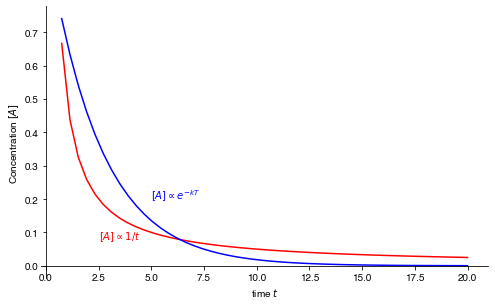

In [14]:
t = numpy.linspace(0.75, 20, 50)

fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(8,5))

axis.set_xlabel('time $t$')
axis.set_ylabel('Concentration $[A]$',rotation=90)
axis.spines['left'].set_position('zero')
axis.spines['right'].set_color('none')
axis.spines['bottom'].set_position('zero')
axis.spines['top'].set_color('none')

def func1(t):
    return(0.5/t)

def func2(t):
    k=0.4
    return(numpy.exp(-k*t))

y1=func1(t)
y2=func2(t)

axis.annotate('$[A] \propto 1/t \frac{1}{t}$',xy=(2.5,.08),c='r')
axis.annotate('$[A] \propto e^{-kT}$',xy=(5,0.2),c='b')
axis.plot(t, y1,'r-')
axis.plot(t, y2,'b-')
plt.show()

code_toggle()

Both initially decay rapidly, but the second order converges to zero much more slowly than first order.

The key result is:

$$[A]={{[A]_0}\over{[A]_0k_2t+1}}$$

<div class="alert alert-block alert-success">
<img src="images/pointing-finger.png" width=50 title="For you" style="vertical-align:top"/>
<b>For you:</b><br>
What would you plot against $t$ to obtain a straight line? Rearrange the above equation so that it is in the form $y=mx+c$ [here $x\equiv t$ and $y\equiv f(A)$].
</div>

### Second Order Reactions, Two Reactants

Here we are concerned with reactions and reaction rates of the form

$$A+B\longrightarrow{\rm products}\qquad{\rm where}\qquad v=-\frac{d[A]}{dt}=k_2[A][B]$$

How we integrate a second order rate law will depend on the *stoichiometric coefficients* involved.  Here, we treat only the simplest case, when each of these coefficients is 1.  In this case, each $A$ that disappears entails the disappearance of one $B$.  Thus, if $x$ of species $A$ have disappeared, then also $x$ of species $B$ has disappeared, and $x$ of the product $P$ have been formed.



To make the calculations less cumbersome to write, let $a=[A]_0$, $b=[B]_0$, and $x=[P]$.  

Then 

\begin{align*}
[A]=[A]_0-x&=a-x\\
[B]=[B]_0-x&=b-x
\end{align*}

and the rate law is given by 

$$\displaystyle \frac{d[A]}{dt}=-k_2(a-x)(b-x)$$.  

but also we know that, 

$$\displaystyle \frac{d[A]}{dt}=\frac{d}{dt}{(a-x)}=-\frac{dx}{dt}$$  

Thus, for the integrated rate law we need to solve

$$\frac{dx}{dt}=k_2(a-x)(b-x)$$


Note:  We are assuming *different* initial concentrations, so $a\ne b$.  If the initial concentrations were the same, we would solve the differential equation $\displaystyle \frac{dx}{dt}=k_2(a-x)^2$ by the methods used in the previous case.

As usual, we apply SISI and, after separating, integrate both sides w.r.t $t$ which requires us to use the method of *partial fractions*.

\begin{align*}
\frac{dx}{dt} &= k_2(a-x)(b-x)\\
\frac{1}{(a-x)(b-x)}\frac{dx}{dt} &= k_2\\
\int \frac{1}{(a-x)(b-x)}\frac{dx}{dt}. dt &= \int k_2.dt\\
\int \frac{1}{(a-x)(b-x)}dx &= k_2 t+c_1\\
\end{align*}


We introduce the undetermined coefficients $M$ and $N$ and write the integrand as the sum of two *partial fractions*

$${1\over{(a-x)(b-x)}}={M\over{(a-x)}}+{N\over{(b-x)}}$$

Next, multiply both sides by $(a-x)(b-x)$ and cancel as appropriate to get

\begin{align*}
1 &= M(b-x)+N(a-x)\\
&=Mb-Mx+Na-Nx\\
&=-(M+N)x+(Mb+Na)\\
\end{align*}


From this, by equating coefficients of $x^1$ and $x^0$ separately, it can be seen that:

\begin{align*}
M+N&=0\\
bM+aN&=1\\
\end{align*}

From above we see that $N=-M$. Substituting this back above and simplifying we get

\begin{align*}
1 &= bM+a(-M)\\
&=(b-a)M
\end{align*}

which\ gives $\displaystyle M={1\over{b-a}}$ and $\displaystyle N={{-1}\over{b-a}}$.  Thus:

\begin{align*}
{1\over{(a-x)(b-x)}}&={{1/(b-a)}\over{(a-x)}}+{{-1/(b-a)}\over{(b-x)}}\\
&={1\over{(b-a)}}\left[{{1}\over{(a-x)}}-{1\over{(b-x)}}\right]
\end{align*}

\begin{align*}
\int \frac{1}{(a-x)(b-x)}.dx &= k_2 t+c_1\\
\int {1\over{(b-a)}}\left[{{1}\over{(a-x)}}-{1\over{(b-x)}}\right].dx &= k_2t + c_1\\
{1\over{(b-a)}} \left[ \int {{1}\over{(a-x)}}.dx - \int {1\over{(b-x)}}.dx \right] &= k_2t + c_1
\end{align*}


We can solve each integral on the LHS using *substitution*. i.e.

$$\int f(g(x)).dx=\int f(u){dx\over du}. du$$

Let's tackle the first integral; make the substitution

\begin{align*}
u &= a-x\\
\frac{du}{dx} &= -1\\
\frac{dx}{du} &= -1\\
\end{align*}



We've got what we need to integrate the first integral by substitution now:

\begin{align*}
\int {1\over{(a-x)}}dx &= -\int {{1}\over u}.du\\
&=-\ln u + c_2\\
&= \ln{1\over u} + c_2\\
&=\ln \left( {1\over{a-x}} \right)+c_2
\end{align*}

In the same way we obtain
$$\int {1\over{(b-x)}}dx  = \ln\left({1\over{b-x}}\right)+c_3$$


Putting all this back together 

\begin{align*}
\int{1\over{(a-x)(b-x)}}dx &= k_2t+c_1\\
{1\over{(b-a)}} \left[ \int {{1}\over{(a-x)}}.dx - \int {1\over{(b-x)}}.dx \right] &= k_2t + c_1\\
{1\over{(b-a)}}\left[{\ln\left({1\over{a-x}}\right)-\ln\left({1\over{b-x}}\right)}\right]+c_2+c_3&=k_2t+c_1\\
{1\over{(b-a)}}\ln\left({{b-x}\over{a-x}}\right)+c_2+c_3 &= k_2t+c_1\\
{1\over{(b-a)}}\ln\left({{b-x}\over{a-x}}\right) &= k_2t+C
\end{align*}

where $C = c_1-c_2-c_3$

Using the initial conditions that $x=0$ when $t=0$ we obtain:

\begin{align*}
{1\over{(b-a)}}\ln\left({{b-0}\over{a-0}}\right)&=k_2\cdot 0+C\\
C&={1\over{(b-a)}}\ln\left({{b}\over{a}}\right)
\end{align*}

Substituting this back and rearranging

\begin{align*}
{1\over{(b-a)}}\ln\left({{b-x}\over{a-x}}\right)-{1\over{(b-a)}}\ln\left({{b}\over{a}}\right)&=k_2t\\
\ln\left({{b-x}\over{a-x}}\right)-\ln\left({{b}\over{a}}\right)&=(b-a)k_2t\\
\ln\left(\left({{b-x}\over{a-x}}\right)/\left({{b}\over{a}}\right)\right)&=(b-a)k_2t\\
\ln\left({a(b-x)\over b(a-x)}\right)&=(b-a)k_2t\\
\end{align*}


Finally, substituting back the concentrations $[A]=a-x=[A]_0-x$, $[B]=b-x=[B]_0-x$, putting $[Q]_0=[B]_0-[A]_0~$ and simplifying, we obtain:

\begin{align*} 
\ln\biggr({[A]_0([B]_0-x)\over
[B_0]([A]_0-x)}\biggl)&=([B]_0-[A]_0)k_2t\\
&=[Q]_0k_2t
\end{align*}

Although complex, if a reaction is second order and has two reactants each with stochiometric coefficients of 1, a plot of $\displaystyle Y=\ln\left({[A]_0([B]_0-x)\over [B]_0([A]_0-x)}\right)$ versus $t$ will be a straight line with slope $k_2[Q]_0$ where $[Q]_0 = [B]_0 - [A]_0$. In an experiment you would measure $x$ and $t$, and knowing $[A]_0$ and $[B]_0$ would then plot the above function to test whether or not it was a straight line.

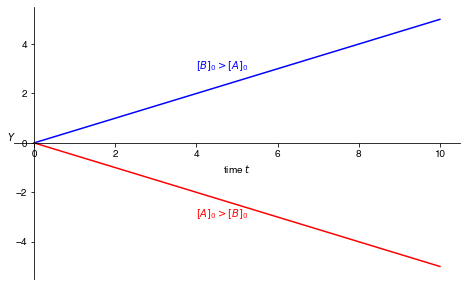

In [39]:
t = numpy.linspace(0, 10, 50)

fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(8,5))

axis.set_xlabel('time $t$')
axis.set_ylabel('$Y$',rotation=0)
axis.spines['left'].set_position('zero')
axis.spines['right'].set_color('none')
axis.spines['bottom'].set_position('zero')
axis.spines['top'].set_color('none')

def func(t,A0,B0,k2):
    Q0=B0-A0
    exp_term=numpy.exp(k2*Q0*t)
    x=B0*(exp_term-1)/((B0/A0)*exp_term+1)
    return(x)


x=func(t,2,1,0.5)
axis.plot((0,10), (0,5),'b-')
x=func(t,1,2,0.8)
axis.plot((0,10), (0,-5),'r-')


axis.annotate('$[B]_0>[A]_0$',xy=(4,3),c='b')
axis.annotate('$[A]_0>[B]_0$',xy=(4,-3),c='r')
# axis.annotate('$[A] \propto e^{-kT}$',xy=(5,0.2),c='b')
# axis.plot(t, y1,'r-')
plt.show()

code_toggle()

We've just shown that  

\begin{align*} 
\ln\biggr({[A]_0([B]_0-x)\over
[B_0]([A]_0-x)}\biggl)&=[Q]_0k_2t
\end{align*}

Can we make a concentration the subject of the equation? Because there are two different species involved we rearrange the equation to write $[A]$ as a function of $t$ alone.  However, we *can* rewrite the product concentration $x$ (=$[P]$) as a function of $t$ and the initial concentrations $[A]_0$ and $[B]_0$.  

\begin{align*} 
[Q]_0k_2t &= \ln\left({[A]_0([B]_0-x)\over [B_0]([A]_0-x)}\right)\\
e^{[Q]_0k_2t} &= {[A]_0([B]_0-x)\over [B_0]([A]_0-x)}\\
[B_0]([A]_0-x)e^{[Q]_0k_2t} &= [A]_0([B]_0-x)\\
[A]_0[B]_0e^{[Q]_0k_2t}-[A]_0[B]_0 &= x[B]_0e^{[Q]_0k_2t}-[A]_0x\\
[B]_0(e^{[Q]_0k_2t}-1) &= x\frac{[B]_0}{[A]_0}e^{[Q]_0k_2t}-x\\
[B]_0(e^{[Q]_0k_2t}-1) &= x\left(\frac{[B]_0}{[A]_0}e^{[Q]_0k_2t}-1\right)\\
 x &=  \frac{[B]_0(e^{[Q]_0k_2t}-1)}{\left(\frac{[B]_0}{[A]_0}e^{[Q]_0k_2t}-1\right)}\\
\end{align*}

This is the time-dependence of a SECOND ORDER process. Note that it depends on the initial concentrations of $A$ and $B$ (i.e. $[A]_0$ and $[B]_0$).

The time-dependence depends on the exact values of $[A]_0, [B]_0, k_2$ and e.g. which of $[A]_0$ or  $[B]_0$ is the larger. A few examples are plotted below. 


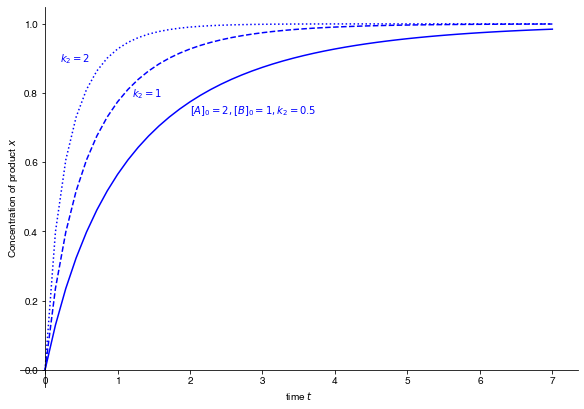

In [24]:
t = numpy.linspace(0, 7, 50)

fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(10,7))

axis.set_xlabel('time $t$')
axis.set_ylabel('Concentration of product $x$',rotation=90)
axis.spines['left'].set_position('zero')
axis.spines['right'].set_color('none')
axis.spines['bottom'].set_position('zero')
axis.spines['top'].set_color('none')

def func(t,A0,B0,k2):
    Q0=B0-A0
    exp_term=numpy.exp(k2*Q0*t)
    x=B0*(exp_term-1)/((B0/A0)*exp_term-1)
    return(x)

x=func(t,2,1,0.5)
axis.plot(t, x,'b-')
axis.annotate('$[A]_0=2,[B]_0=1,k_2=0.5$',xy=(2,0.75),c='b',ha='left',va='center')
x=func(t,2,1,1)
axis.plot(t, x,'b--')
axis.annotate('$k_2=1$',xy=(1.2,0.8),c='b',ha='left',va='center')
x=func(t,2,1,2)
axis.plot(t, x,'b:')
axis.annotate('$k_2=2$',xy=(.2,.9),c='b',ha='left',va='center')

# x=func(t,1,1.5,1)
# axis.plot(t, x,'r-')
# axis.annotate('$[A]_0=1,[B]_0=1.5,k_2=1$',xy=(3,0.6),c='r',ha='left',va='center')
# x=func(t,1,3,1)
# axis.plot(t, x,'r--')
# axis.annotate('$[B]_0=3$',xy=(0.7,0.6),c='r',ha='left',va='center')
# x=func(t,1,6,1)
# axis.plot(t, x,'r:')
# axis.annotate('$[B]_0=6$',xy=(0.5,0.6),c='r',ha='right',va='center')

plt.show()

code_toggle()

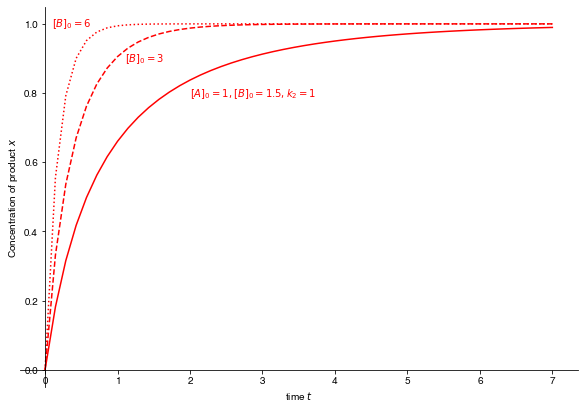

In [20]:
t = numpy.linspace(0, 7, 50)

fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(10,7))

axis.set_xlabel('time $t$')
axis.set_ylabel('Concentration of product $x$',rotation=90)
axis.spines['left'].set_position('zero')
axis.spines['right'].set_color('none')
axis.spines['bottom'].set_position('zero')
axis.spines['top'].set_color('none')

def func(t,A0,B0,k2):
    Q0=B0-A0
    exp_term=numpy.exp(k2*Q0*t)
    x=B0*(exp_term-1)/((B0/A0)*exp_term-1)
    return(x)

# x=func(t,2,1,0.5)
# axis.plot(t, x,'b-')
# axis.annotate('$[A]_0=2,[B]_0=1,k_2=0.5$',xy=(4,-0.75),c='b',ha='left',va='center')
# x=func(t,2,1,1)
# axis.plot(t, x,'b--')
# axis.annotate('$k_2=1$',xy=(2,-0.75),c='b',ha='left',va='center')
# x=func(t,2,1,2)
# axis.plot(t, x,'b:')
# axis.annotate('$k_2=2$',xy=(1,-0.75),c='b',ha='left',va='center')

x=func(t,1,1.5,1)
axis.plot(t, x,'r-')
axis.annotate('$[A]_0=1,[B]_0=1.5,k_2=1$',xy=(2,0.8),c='r',ha='left',va='center')
x=func(t,1,3,1)
axis.plot(t, x,'r--')
axis.annotate('$[B]_0=3$',xy=(1.1,0.9),c='r',ha='left',va='center')
x=func(t,1,6,1)
axis.plot(t, x,'r:')
axis.annotate('$[B]_0=6$',xy=(0.1,1),c='r',ha='left',va='center')

plt.show()

code_toggle()

<div class="alert alert-block alert-warning">
<img src="images/thinking-face.png" width=50 title="Hmm" style="vertical-align:top"/>
<b>Thought:</b> This complex behaviour is not intuitive and is a demonstration of why it is important to know the underlying kinetic theory and then how to transform the relevant equation into a straight line so you can plot your experimental data to (i) conform it is the order you expect and then (ii) calculate the values of the relevant rate constants. 
</div>

### Third Order Reactions

The sum of powers to which concentrations are raised is 3.

#### Example

$$\text{2NO(gas)} + \text{O}_2\text{(gas)} \longrightarrow \text{2NO}_2\text{(gas)}$$


The rate law is (where $x$ is the concentration of product)

$$\frac{dx}{dt} = k[\text{NO}]^2[\text{O}_2]$$

We are not going to look at the mathematics of such processes in any more detail.

### Biophysical Chemistry, Chemical Kinetics, Lecture 2, R.G. Ratcliffe

#### Section entitled 'Consecutive reactions 3'

$$A\xrightarrow{k_1} B \xrightarrow{k_2} C$$

For A: 
$${d[A]\over dt} =-k_1[A]$$ 

so 

$$[A]=[A]_0e^{-k_1t}$$

For B: 

\begin{align*}
{d[B]\over dt} &=k_1[A]-k_2[B]\\
&=k_1[A]_0e^{-k_1t}-k_2[B]
\end{align*}

To separate the variables, let: $[B]=fe^{-k_1t}$, so by the Product Rule:

$${dB\over dt}=f.(-k_1).~e^{-k_1t}+{df\over dt}~e^{-k_1t}$$

We have two expressions for $\displaystyle \frac{dB}{dt}$, so equating them

\begin{align*}
{dB\over dt}&=k_1[A]_0e^{-k_1t}-k_2 [B]\\
(-)fk_1~e^{-k_1t}+{df\over dt}~e^{-k_1t}&=k_1[A]_0e^{-k_1t}-k_2 [B]\\
\end{align*}

Now we know that $[B]=fe^{-k_1t}$, so substituting into this equation we get:

$$(-)fk_1~e^{-k_1t}+{df\over dt}~e^{-k_1t}=k_1[A]_0e^{-k_1t}-k_2fe^{-k_1t}$$

Rearrange to get:

$$\biggl({df\over dt}\biggr)~e^{-k_1t}=k_1[A]_0e^{-k_1t}-k_2fe^{-k_1t}+fk_1~e^{-k_1t}$$

so dividing every term by $e^{-k_1t}$ gives:

$$\boxed{\left({df\over dt}\right)=k_1A_0+(k_1-k_2)f}$$
QED as per your lecture notes.